This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Introduction to Keras and TensorFlow

## What's TensorFlow?

## What's Keras?

## Keras and TensorFlow: A brief history

## Setting up a deep-learning workspace

### Jupyter notebooks: The preferred way to run deep-learning experiments

### Using Colaboratory

#### First steps with Colaboratory

#### Installing packages with pip

#### Using the GPU runtime

## First steps with TensorFlow

#### Constant tensors and variables

**All-ones or all-zeros tensors**

In [1]:
# import tensorflow as tf
# x = tf.ones(shape=(2, 1))
# print(x)

In [2]:
# tf.ones?

In [3]:
import tensorflow as tf
x = tf.ones((2,3))
x

2023-08-19 18:34:50.871038: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-19 18:34:50.902204: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-19 18:34:51.399955: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-08-19 18:34:51.943292: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4787 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3070 Laptop GPU, pci bus id: 0000:01:00.0, c

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [4]:
# x = tf.zeros(shape=(2, 1))
# print(x)

In [5]:
x = tf.zeros( (3,4))
x

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

**Random tensors**

In [6]:
# x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
# print(x)

In [7]:
x = tf.random.normal( (3,3), mean=0., stddev=1.)
x

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[ 0.33236772,  1.888805  ,  1.2713225 ],
       [ 0.8459379 , -0.58712965,  0.5811702 ],
       [-0.7377544 , -0.23736991,  0.5542819 ]], dtype=float32)>

In [8]:
# x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
# print(x)

In [9]:
x = tf.random.uniform( (3,3), minval=-1., maxval=1. )
x

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[ 0.6337712 , -0.23043251,  0.437366  ],
       [ 0.5898533 ,  0.88322854, -0.17211437],
       [-0.19670081,  0.07604861,  0.4006586 ]], dtype=float32)>

**NumPy arrays are assignable**

In [10]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.

**Creating a TensorFlow variable**

In [11]:
# v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
# print(v)

In [12]:
v = tf.Variable(tf.random.normal((3,3)))
v

<tf.Variable 'Variable:0' shape=(3, 3) dtype=float32, numpy=
array([[ 0.8475013 , -0.26824757,  1.6620756 ],
       [-0.23002516,  0.3695028 ,  0.93884856],
       [ 0.15068492,  0.16642222,  1.7273587 ]], dtype=float32)>

**Assigning a value to a TensorFlow variable**

In [13]:
# v.assign(tf.ones((3, 1)))

In [14]:
v.assign( tf.ones((3,3)) )
v

<tf.Variable 'Variable:0' shape=(3, 3) dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

**Assigning a value to a subset of a TensorFlow variable**

In [15]:
# v[0, 0].assign(3.)

In [16]:
v[0,1].assign(0.)
v

<tf.Variable 'Variable:0' shape=(3, 3) dtype=float32, numpy=
array([[1., 0., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

**Using `assign_add`**

In [17]:
# v.assign_add(tf.ones((3, 1)))

In [18]:
v.assign_add( tf.ones( (3,3)) )

<tf.Variable 'UnreadVariable' shape=(3, 3) dtype=float32, numpy=
array([[2., 1., 2.],
       [2., 2., 2.],
       [2., 2., 2.]], dtype=float32)>

In [19]:
v.assign_sub( tf.ones( (3,3) ) )
v

<tf.Variable 'Variable:0' shape=(3, 3) dtype=float32, numpy=
array([[1., 0., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

#### Tensor operations: Doing math in TensorFlow

**A few basic math operations**

In [20]:
# a = tf.ones((2, 2))
# b = tf.square(a)
# c = tf.sqrt(a)
# d = b + c
# e = tf.matmul(a, b)
# e *= d

In [21]:
a = tf.ones((3,3)) + 2.
b = tf.square(a)
a
b
c = tf.sqrt(b)
c
d = b+c
d
e = tf.matmul(a,b)
e
e *=d
e

2023-08-19 18:34:52.145181: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[972., 972., 972.],
       [972., 972., 972.],
       [972., 972., 972.]], dtype=float32)>

#### A second look at the GradientTape API

**Using the `GradientTape`**

In [22]:
# input_var = tf.Variable(initial_value=3.)
# with tf.GradientTape() as tape:
#    result = tf.square(input_var)
# gradient = tape.gradient(result, input_var)

In [23]:
inp_var = tf.Variable(2.5)
inp_var
with tf.GradientTape() as tape:
    y = tf.square(inp_var)

grad = tape.gradient(y,inp_var)
grad

<tf.Tensor: shape=(), dtype=float32, numpy=5.0>

**Using `GradientTape` with constant tensor inputs**

In [24]:
# input_const = tf.constant(3.)
# with tf.GradientTape() as tape:
#    tape.watch(input_const)
#    result = tf.square(input_const)
# gradient = tape.gradient(result, input_const)
# gradient

# Note by me - any variable that is explicitly made to be watch()'ed by tape is, practically, treated as a variable.

In [25]:
inp_const = tf.constant(5.2)
with tf.GradientTape() as tape:
    tape.watch(inp_const)
    y = tf.square(inp_const)
grad = tape.gradient(y,inp_const)
grad

<tf.Tensor: shape=(), dtype=float32, numpy=10.4>

**Using nested gradient tapes to compute second-order gradients**

In [26]:
# time = tf.Variable(0.)
# with tf.GradientTape() as outer_tape:
#     with tf.GradientTape() as inner_tape:
#         position =  4.9 * time ** 2
#     speed = inner_tape.gradient(position, time)
# acceleration = outer_tape.gradient(speed, time)

In [27]:
t = tf.Variable(2.4)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        dist = 4.9 * t**2
    vel = inner_tape.gradient(dist, t)
acc = outer_tape.gradient(vel,t)
print(vel)
print(acc)

tf.Tensor(23.52, shape=(), dtype=float32)
tf.Tensor(9.8, shape=(), dtype=float32)


#### An end-to-end example: A linear classifier in pure TensorFlow

**Generating two classes of random points in a 2D plane**

In [28]:
# num_samples_per_class = 1000
# negative_samples = np.random.multivariate_normal(
#     mean=[0, 3],
#     cov=[[1, 0.5],[0.5, 1]],
#     size=num_samples_per_class)
# positive_samples = np.random.multivariate_normal(
#     mean=[3, 0],
#     cov=[[1, 0.5],[0.5, 1]],
#     size=num_samples_per_class)

### Note - if we increase the mean of the normal, say, from 3 to 5, the training becomes unstable and loss diverges to "infinity".

In [29]:
num_samples_per_class = 1000
pos_samples = np.random.multivariate_normal(mean=[0,3], cov=[ [1,0.5], [0.5,1.]], size=num_samples_per_class)
neg_samples = np.random.multivariate_normal(mean=[3,0], cov=[ [1,0.5], [0.5,1.]], size=num_samples_per_class)


**Stacking the two classes into an array with shape (2000, 2)**

# Array merging operations - From documentation -
--------
concatenate : Join a sequence of arrays along an existing axis. </br>
stack : Join a sequence of arrays along a new axis. </br>
block : Assemble an nd-array from nested lists of blocks. </br>
hstack : Stack arrays in sequence horizontally (column wise). </br>
vstack : Stack arrays in sequence vertically (row wise). </br>
dstack : Stack arrays in sequence depth wise (along third axis). </br>
column_stack : Stack 1-D arrays as columns into a 2-D array. </br>
hsplit : Split an array into multiple sub-arrays horizontally (column-wise). </br>
vsplit : Split an array into multiple sub-arrays vertically (row-wise). </br>


In [30]:
arr1 = np.ones((3,4))
arr2 = 4*np.ones((3,4))
arr1
arr2
for axis in range(len(arr1.shape)+1):
    arr_stk = np.stack([arr1,arr2],axis=axis)
    print(f"arr_stk -> axis = {axis}, shape = {arr_stk.shape}")
for axis in range(len(arr1.shape)):
    arr_concat = np.concatenate([arr1,arr2],axis=axis)
    print(f"arr_concat -> axis = {axis}, shape = {arr_concat.shape}")

# vstack adds along rows
arr_vstk = np.vstack([arr1,arr2])
print(f"arr_vstk.shape = {arr_vstk.shape}")
# hstack adds along cols
arr_hstk = np.hstack([arr1,arr2])
print(f"arr_hstk.shape = {arr_hstk.shape}")

arr_stk -> axis = 0, shape = (2, 3, 4)
arr_stk -> axis = 1, shape = (3, 2, 4)
arr_stk -> axis = 2, shape = (3, 4, 2)
arr_concat -> axis = 0, shape = (6, 4)
arr_concat -> axis = 1, shape = (3, 8)
arr_vstk.shape = (6, 4)
arr_hstk.shape = (3, 8)


### numpy.block()

In [31]:
A = np.eye(2) * 2
B = np.eye(3) * 3
C = np.block([
    [A,               np.zeros((2, 3))],

    [np.ones((3, 2)), B               ]

])
print(C)

# using block for hstack-ing
# With a list of depth 1, block can be used as hstack
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
print(np.block([a, b, 10]))             # hstack([a, b, 10])


# With a list of depth 2, block can be used in place of vstack:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
print(np.block([[a], [b]]) )             # vstack([a, b])

[[2. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0.]
 [1. 1. 3. 0. 0.]
 [1. 1. 0. 3. 0.]
 [1. 1. 0. 0. 3.]]
[ 1  2  3  4  5  6 10]
[[1 2 3]
 [4 5 6]]


### np.tile()

In [32]:
a = np.array([0, 1, 2])

np.tile(a, 2)

np.tile(a, (2, 2))
np.tile(a, (2, 1, 2))


array([[[0, 1, 2, 0, 1, 2]],

       [[0, 1, 2, 0, 1, 2]]])

In [33]:
# inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [34]:
neg_samples.shape
neg_samples[:10]

array([[ 4.40627763,  0.05630109],
       [ 1.10726214, -0.4094524 ],
       [ 3.67867663, -0.75757719],
       [ 2.91826808,  0.48370563],
       [ 2.67504879,  1.75671888],
       [ 5.48341137,  1.22365038],
       [ 2.25352275, -0.78896489],
       [ 2.6210306 ,  0.2543222 ],
       [ 3.45102561, -0.78399689],
       [ 1.75424663,  0.05143811]])

In [35]:
inp_samples = np.vstack( (neg_samples, pos_samples) ).astype(np.float32)

In [36]:
inp_samples.shape

(2000, 2)

**Generating the corresponding targets (0 and 1)**

In [37]:
# targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
#                      np.ones((num_samples_per_class, 1), dtype="float32")))

In [38]:
# targets.shape

In [39]:
np.zeros_like( inp_samples ).shape

(2000, 2)

In [40]:
neg_samples[:,0].shape

(1000,)

In [41]:
inp_labels = np.vstack( ( np.zeros_like( neg_samples[:,0],dtype="float32" )[:,np.newaxis], np.ones_like( pos_samples[:,0],dtype="float32")[:,np.newaxis] ) )

In [42]:
inp_labels.shape

(2000, 1)

**Plotting the two point classes**

In [43]:
# import matplotlib.pyplot as plt
# plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
# plt.show()

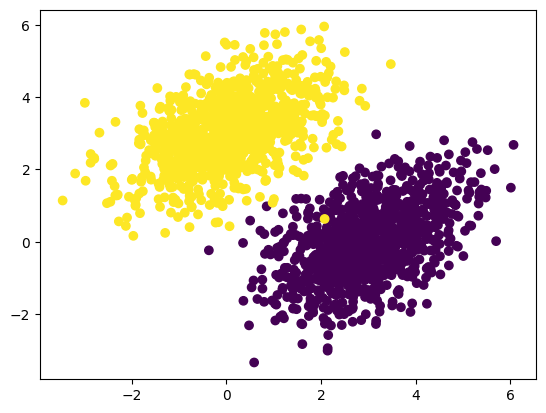

In [44]:
import matplotlib.pyplot as plt
plt.scatter(inp_samples[:,0], inp_samples[:,1], c=inp_labels[:,0])
plt.show()

**Creating the linear classifier variables**

In [45]:
# input_dim = 2
# output_dim = 1
# W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
# b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [46]:
inp_dim = 2
out_dim = 1
w = tf.Variable(tf.random.uniform(shape=(inp_dim, out_dim)))
b = tf.Variable(tf.random.uniform(shape=(out_dim,)))

In [47]:
w

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.28029704],
       [0.48419774]], dtype=float32)>

**The forward pass function**

In [48]:
# def model(inputs):
#     return tf.matmul(inputs, W) + b

In [49]:
def model(inputs):
    global w,b
    return tf.matmul(inputs, w) + b

**The mean squared error loss function**

In [50]:
# def square_loss(targets, predictions):
#     per_sample_losses = tf.square(targets - predictions)
#     return tf.reduce_mean(per_sample_losses)

In [51]:
def mse_loss(preds, labels):
    loss_batch = tf.square(labels - preds)
    return tf.reduce_mean(loss_batch)

**The training step function**

In [52]:
# learning_rate = 0.1

# def training_step(inputs, targets):
#     with tf.GradientTape() as tape:
#         predictions = model(inputs)
#         loss = square_loss(targets, predictions)
#     grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
#     W.assign_sub(grad_loss_wrt_W * learning_rate)
#     b.assign_sub(grad_loss_wrt_b * learning_rate)
#     return loss

In [53]:
lr = 0.1
def training_step(inputs, labels):
    global w, b
    with tf.GradientTape() as tape:
        preds = model(inputs)
        loss = mse_loss(labels, preds)

    grad = tape.gradient(loss, [w,b])
    w.assign_sub( grad[0]*lr)
    b.assign_sub( grad[1]*lr)
    
    return loss

**The batch training loop**

In [54]:
# for step in range(40):
#     loss = training_step(inputs, targets)
#     print(f"Loss at step {step}: {loss:.4f}")

In [55]:
for epoch in range(40):
    loss = training_step(inp_samples, inp_labels)
    print(f"loss at epoch {epoch} = {loss}")

loss at epoch 0 = 2.8359949588775635
loss at epoch 1 = 0.42499059438705444
loss at epoch 2 = 0.08734908699989319
loss at epoch 3 = 0.038961559534072876
loss at epoch 4 = 0.0316922701895237
loss at epoch 5 = 0.030296895653009415
loss at epoch 6 = 0.02976689487695694
loss at epoch 7 = 0.02938826195895672
loss at epoch 8 = 0.02905714139342308
loss at epoch 9 = 0.028756560757756233
loss at epoch 10 = 0.028482064604759216
loss at epoch 11 = 0.02823115512728691
loss at epoch 12 = 0.02800176851451397
loss at epoch 13 = 0.027792058885097504
loss at epoch 14 = 0.02760033681988716
loss at epoch 15 = 0.02742505632340908
loss at epoch 16 = 0.027264809235930443
loss at epoch 17 = 0.02711830660700798
loss at epoch 18 = 0.02698436938226223
loss at epoch 19 = 0.026861920952796936
loss at epoch 20 = 0.026749974116683006
loss at epoch 21 = 0.026647629216313362
loss at epoch 22 = 0.026554061099886894
loss at epoch 23 = 0.026468517258763313
loss at epoch 24 = 0.026390312239527702
loss at epoch 25 = 0.0263

In [59]:
# predictions = model(inputs)
# plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
# plt.show()

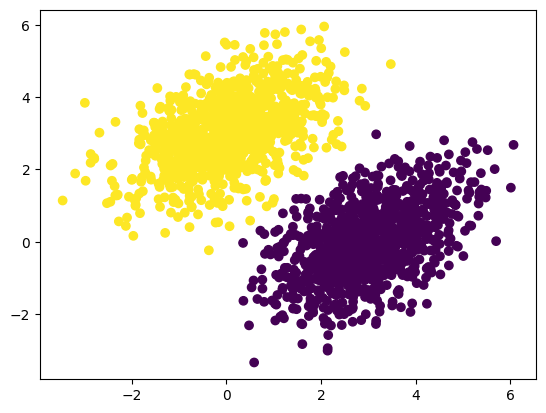

In [58]:
preds = model(inp_samples)
plt.scatter(inp_samples[:,0], inp_samples[:,1], c=preds[:,0] > 0.5)

# Not clear how the boundary is drawn

In [ ]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

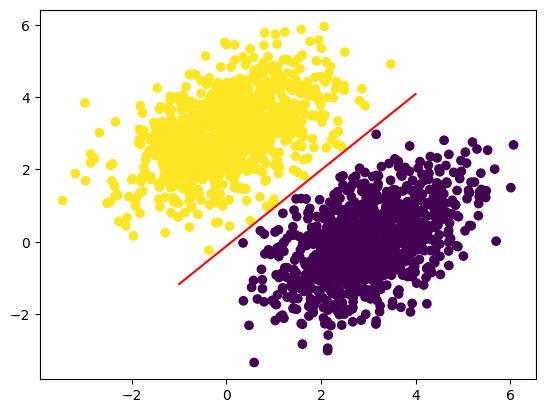

In [64]:
x = np.linspace(-1, 4, 100)
y = - w[0] /  w[1] * x + (0.5 - b) / w[1]
plt.plot(x, y, "-r")
plt.scatter(inp_samples[:, 0], inp_samples[:, 1], c=preds[:, 0] > 0.5)

## Anatomy of a neural network: Understanding core Keras APIs

### Layers: The building blocks of deep learning

#### The base Layer class in Keras

**A `Dense` layer implemented as a `Layer` subclass**

In [ ]:
# from tensorflow import keras

# class SimpleDense(keras.layers.Layer):

#     def __init__(self, units, activation=None):
#         super().__init__()
#         self.units = units
#         self.activation = activation

#     def build(self, input_shape):
#         input_dim = input_shape[-1]
#         self.W = self.add_weight(shape=(input_dim, self.units),
#                                  initializer="random_normal")
#         self.b = self.add_weight(shape=(self.units,),
#                                  initializer="zeros")

#     def call(self, inputs):
#         y = tf.matmul(inputs, self.W) + self.b
#         if self.activation is not None:
#             y = self.activation(y)
#         return y

# Note- 
https://datascience.stackexchange.com/questions/82860/what-is-the-use-of-function-build-in-custom-layers-in-tensorflow-keras

build is called by the __call__ function which is implemented in the parent Layer class.

From the TF docs: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Layer

"build(self, input_shape): This method can be used to create weights that depend on the shape(s) of the input(s), using add_weight(). __call__() will automatically build the layer (if it has not been built yet) by calling build()."


In [66]:
from tensorflow import keras

class SimpleDenseLayer(keras.layers.Layer):
    def __init__(self, units, activation):
        super().__init__()
        self.units = units
        self.activation = activation
    
    def build(self, input_shape):
        input_dim = input.shape[-1]
        self.w = self.add_weight(shape=(input_dim,self.units), initializer='random_normal' )
        self.b = self.add_weight(shape=(self.units,), initializer='random_normal')
        
    def call(self, inputs):
        y = tf.matmul(inputs, self.w) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [68]:
# my_dense = SimpleDense(units=32, activation=tf.nn.relu)
# input_tensor = tf.ones(shape=(2, 784))
# output_tensor = my_dense(input_tensor)
# print(output_tensor.shape)

In [67]:
dense_mine = SimpleDenseLayer(units=64, activation=tf.nn.relu)
input = tf.ones((2,784))
output = dense_mine(input)
output.shape

TensorShape([2, 64])

#### Automatic shape inference: Building layers on the fly

In [71]:
# from tensorflow.keras import layers
# layer = layers.Dense(32, activation="relu")

In [70]:
from tensorflow.keras import layers
l = layers.Dense(32, activation='relu')

In [73]:
# from tensorflow.keras import models
# from tensorflow.keras import layers
# model = models.Sequential([
#     layers.Dense(32, activation="relu"),
#     layers.Dense(32)
# ])

In [72]:
from tensorflow.keras import models, layers
model = models.Sequential(
    [
        layers.Dense(32, activation='relu'),
        layers.Dense(32)
    ]
)

In [ ]:
# model = keras.Sequential([
#     SimpleDense(32, activation="relu"),
#     SimpleDense(64, activation="relu"),
#     SimpleDense(32, activation="relu"),
#     SimpleDense(10, activation="softmax")
# ])

In [74]:
model = keras.Sequential(
    [
        SimpleDenseLayer(32, activation='relu'),
        SimpleDenseLayer(64, activation='relu'),
        SimpleDenseLayer(128, activation='relu'),
        SimpleDenseLayer(64, activation='relu'),
        SimpleDenseLayer(32, activation='relu'),
        SimpleDenseLayer(10, activation='softmax')
    ]
)

### From layers to models

### The "compile" step: Configuring the learning process

In [76]:
# model = keras.Sequential([keras.layers.Dense(1)])
# model.compile(optimizer="rmsprop",
#               loss="mean_squared_error",
#               metrics=["accuracy"])

In [81]:
# model = keras.Sequential( [keras.layers.Dense(16),
#                            keras.layers.Dense(32)] )
model = keras.Sequential( keras.layers.Dense(1) )
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [82]:
# model.compile(optimizer=keras.optimizers.RMSprop(),
#               loss=keras.losses.MeanSquaredError(),
#               metrics=[keras.metrics.BinaryAccuracy()])

In [83]:
model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError, metrics=[keras.metrics.BinaryAccuracy()])

### Picking a loss function

### Understanding the fit() method

**Calling `fit()` with NumPy data**

In [84]:
history = model.fit(
    inp_samples,
    inp_labels,
    epochs=5,
    batch_size=128
)

Epoch 1/5


TypeError: in user code:

    File "/home/aman/anaconda3/envs/tf_py3.9/lib/python3.9/site-packages/keras/src/engine/training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "/home/aman/anaconda3/envs/tf_py3.9/lib/python3.9/site-packages/keras/src/engine/training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/aman/anaconda3/envs/tf_py3.9/lib/python3.9/site-packages/keras/src/engine/training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "/home/aman/anaconda3/envs/tf_py3.9/lib/python3.9/site-packages/keras/src/engine/training.py", line 1081, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/aman/anaconda3/envs/tf_py3.9/lib/python3.9/site-packages/keras/src/engine/training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "/home/aman/anaconda3/envs/tf_py3.9/lib/python3.9/site-packages/keras/src/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/aman/anaconda3/envs/tf_py3.9/lib/python3.9/site-packages/keras/src/losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "/home/aman/anaconda3/envs/tf_py3.9/lib/python3.9/site-packages/keras/src/losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/aman/anaconda3/envs/tf_py3.9/lib/python3.9/site-packages/keras/src/losses.py", line 358, in __init__  **
        super().__init__(mean_squared_error, name=name, reduction=reduction)
    File "/home/aman/anaconda3/envs/tf_py3.9/lib/python3.9/site-packages/keras/src/losses.py", line 246, in __init__
        super().__init__(reduction=reduction, name=name)
    File "/home/aman/anaconda3/envs/tf_py3.9/lib/python3.9/site-packages/keras/src/losses.py", line 83, in __init__
        losses_utils.ReductionV2.validate(reduction)
    File "/home/aman/anaconda3/envs/tf_py3.9/lib/python3.9/site-packages/keras/src/utils/losses_utils.py", line 87, in validate
        if key not in cls.all():

    TypeError: Expected float32 passed to parameter 'y' of op 'Equal', got 'auto' of type 'str' instead. Error: Expected float32, but got auto of type 'str'.


In [ ]:
history.history

### Monitoring loss and metrics on validation data

**Using the `validation_data` argument**

In [ ]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

In [87]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

idx_permutation = np.random.permutation(len(inp_samples))
shuffled_inp = inp_samples[idx_permutation]
shuffled_labels = inp_labels[idx_permutation]

num_val_samples = int(0.3*len(inp_samples))
val_inputs = shuffled_inp[:num_val_samples]
val_labels = shuffled_labels[:num_val_samples]
training_inp = shuffled_inp[num_val_samples:]
training_labels = shuffled_inp[num_val_samples:]

model.fit(
    training_inp,
    training_labels,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_labels)
)

Epoch 1/5


2023-08-20 00:53:09.318067: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fa29408b760 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-08-20 00:53:09.318142: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Laptop GPU, Compute Capability 8.6
2023-08-20 00:53:09.344855: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-08-20 00:53:09.461182: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8902


56/88 [==================>...........] - ETA: 0s - loss: 2.5554 - binary_accuracy: 0.0000e+00 

2023-08-20 00:53:09.584914: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


88/88 [==============================] - 1s 3ms/step - loss: 2.5920 - binary_accuracy: 0.0000e+00 - val_loss: 2.2216 - val_binary_accuracy: 0.5017
Epoch 2/5
88/88 [==============================] - 0s 2ms/step - loss: 2.5823 - binary_accuracy: 0.0000e+00 - val_loss: 2.0241 - val_binary_accuracy: 0.5133
Epoch 3/5
88/88 [==============================] - 0s 2ms/step - loss: 2.5819 - binary_accuracy: 0.0000e+00 - val_loss: 1.8478 - val_binary_accuracy: 0.5100
Epoch 4/5
88/88 [==============================] - 0s 2ms/step - loss: 2.5818 - binary_accuracy: 0.0000e+00 - val_loss: 1.4134 - val_binary_accuracy: 0.5350
Epoch 5/5
88/88 [==============================] - 0s 2ms/step - loss: 2.5861 - binary_accuracy: 0.0000e+00 - val_loss: 2.1109 - val_binary_accuracy: 0.5100


### Inference: Using a model after training

In [88]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

5/5 [==============================] - 0s 911us/step
[[1.2516605 ]
 [2.9207509 ]
 [1.2584331 ]
 [1.4379426 ]
 [3.4485588 ]
 [1.4158924 ]
 [2.2278862 ]
 [0.14687292]
 [1.5664487 ]
 [1.1058309 ]]


## Summary